<a href="https://colab.research.google.com/github/annisaeka123/Machine_Learning-Semester5/blob/main/UTS/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Annisa Eka Puspita

Kelas : TI-3H

Absen : 02

NIM : 2341720131

--------------------------------------------------------------------------------

**TUGAS STUDI KASUS PEMBELAJARAN MESIN**


**Clustering dan Approximate Nearest Neighbor (ANN)**

Tugas 2 - *Credit Card Dataset*

- Deskripsi: Dataset ini berisi data perilaku pengguna kartu kredit. Gunakan untuk menemukan kelompok pelanggan berdasarkan pola penggunaan.
- Langkah tambahan:
  - Tangani missing values dan normalisasi fitur numerik.
  - Buat fitur baru seperti rasio antara BALANCE dan PURCHASES.

**1. Penjelasan Singkat Dataset**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
path = '/content/drive/MyDrive/Pembelajaran Mesin/UTS/Credit_Card.csv'
df = pd.read_csv(path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


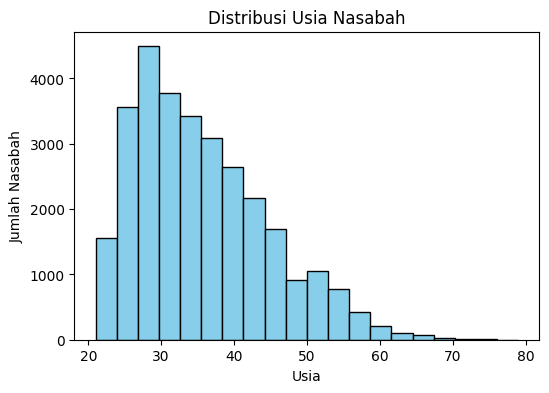

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["AGE"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribusi Usia Nasabah")
plt.xlabel("Usia")
plt.ylabel("Jumlah Nasabah")
plt.show()


Dataset Credit Card berisi data nasabah kartu kredit dengan tujuan untuk memprediksi kemungkinan gagal bayar (default payment) pada bulan berikutnya.

- Jumlah sampel (baris) : 30.000 nasabah
- Jumlah fitur (kolom) : 25 variable
- Tipe data : seluruh kolom bertipe numerik (integer dan float)

**2. Preprocessing Data**

In [39]:
# Baca dataset
df = pd.read_csv(path)

# (a) Cek kolom
print("Nama kolom:", df.columns.tolist())
print("Ukuran data:", df.shape)

Nama kolom: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
Ukuran data: (30000, 25)


In [40]:
print(df.columns.tolist())


['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [41]:
import numpy as np

# Cek nilai unik di kolom kategori
print("EDUCATION:", df['EDUCATION'].value_counts().sort_index())
print("MARRIAGE:", df['MARRIAGE'].value_counts().sort_index())

# Tangani missing implisit
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], np.nan)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, np.nan)

# Cek hasilnya
print("\nSetelah diganti:")
print(df[['EDUCATION', 'MARRIAGE']].isnull().sum())

# Deteksi nasabah yang semua tagihannya 0
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols  = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

no_bill = df[bill_cols].sum(axis=1) == 0
no_pay  = df[pay_cols].sum(axis=1) == 0

print("\nNasabah dengan semua tagihan = 0 :", no_bill.sum())
print("Nasabah dengan semua pembayaran = 0 :", no_pay.sum())


EDUCATION: EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64
MARRIAGE: MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

Setelah diganti:
EDUCATION    345
MARRIAGE      54
dtype: int64

Nasabah dengan semua tagihan = 0 : 870
Nasabah dengan semua pembayaran = 0 : 1432


Terdapat:

- 345 nasabah dengan data pendidikan tidak diketahui

- 54 nasabah dengan status pernikahan tidak diketahui.

- 870 nasabah yang tidak memiliki tagihan sama sekali selama 6 bulan terakhir

- 1.432 nasabah yang tidak pernah melakukan pembayaran

In [42]:
from sklearn.impute import SimpleImputer

# imputasi untuk data kategorikal (EDUCATION, MARRIAGE) menggunakan modus
imputer_mode = SimpleImputer(strategy='most_frequent')
df[['EDUCATION', 'MARRIAGE']] = imputer_mode.fit_transform(df[['EDUCATION', 'MARRIAGE']])

# imputasi untuk data numerik
# Tentukan kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Gunakan median agar lebih tahan terhadap outlier
imputer_median = SimpleImputer(strategy='median')
df[num_cols] = imputer_median.fit_transform(df[num_cols])

# hapus data yang tidak relevan (semua tagihan & pembayaran = 0)
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols  = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

no_bill = df[bill_cols].sum(axis=1) == 0
no_pay  = df[pay_cols].sum(axis=1) == 0

# Gabungkan kondisi keduanya, lalu hapus
df = df[~(no_bill & no_pay)]

Untuk EDUCATION dan MARRIAGE, digunakan modus karena datanya kategorikal (bukan angka yang bisa dirata-rata).

Untuk kolom numerik lain, digunakan median, karena lebih robust terhadap nilai ekstrem (outlier).

Langkah terakhir menghapus nasabah yang tidak memiliki tagihan dan tidak memiliki pembayaran karena tidak memberikan informasi berguna untuk analisis.

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik
numeric_cols = ['LIMIT_BAL', 'AGE'] + \
               [f'BILL_AMT{i}' for i in range(1,7)] + \
               [f'PAY_AMT{i}' for i in range(1,7)]

# Buat salinan data numerik
X_numeric = df[numeric_cols]

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Buat kembali jadi DataFrame biar rapi
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

print("Skala data sesudah normalisasi:")
X_scaled_df.describe().T

Skala data sesudah normalisasi:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29205.0,0.157802,0.131112,0.0,0.040404,0.131313,0.232323,1.0
AGE,29205.0,0.249123,0.158784,0.0,0.120690,0.224138,0.344828,1.0
BILL_AMT1,29205.0,0.193080,0.065604,0.0,0.150483,0.167988,0.207682,1.0
BILL_AMT2,29205.0,0.114163,0.068013,0.0,0.069904,0.088166,0.128960,1.0
BILL_AMT3,29205.0,0.112859,0.038348,0.0,0.088295,0.098007,0.120493,1.0
BILL_AMT4,29205.0,0.202000,0.061041,0.0,0.162988,0.178655,0.213401,1.0
BILL_AMT5,29205.0,0.121708,0.060733,0.0,0.083028,0.099301,0.131595,1.0
BILL_AMT6,29205.0,0.291664,0.046115,0.0,0.262312,0.274821,0.299542,1.0
PAY_AMT1,29205.0,0.006660,0.019187,0.0,0.001242,0.002541,0.005838,1.0
PAY_AMT2,29205.0,0.003611,0.013853,0.0,0.000594,0.001247,0.002969,1.0


In [44]:
# Hitung balance rata-rata dan total purchase
df['avg_bill_amt'] = df[[f'BILL_AMT{i}' for i in range(1,7)]].mean(axis=1)
df['sum_pay_amt'] = df[[f'PAY_AMT{i}' for i in range(1,7)]].sum(axis=1)

# Rasio balance terhadap purchases
df['balance_to_purchases'] = df['avg_bill_amt'] / (df['sum_pay_amt'] + 1)  # +1 biar tidak divide by zero

# Cek hasil
df[['LIMIT_BAL', 'AGE', 'avg_bill_amt', 'sum_pay_amt', 'balance_to_purchases']].head()


,LIMIT_BAL,AGE,avg_bill_amt,sum_pay_amt,balance_to_purchases
0,20000.0,24.0,1284.000000,689.0,1.860870
1,120000.0,26.0,2846.166667,5000.0,0.569120
2,90000.0,34.0,16942.166667,11018.0,1.537541
3,50000.0,37.0,38555.666667,8388.0,4.595979
4,50000.0,57.0,18223.166667,59049.0,0.308606


**3. Proses Clustering**

In [45]:
from sklearn.preprocessing import StandardScaler

#buang kolom default.payment.next.month
X = df.drop(columns=['default.payment.next.month'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

a. K-MEANS Clustering

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

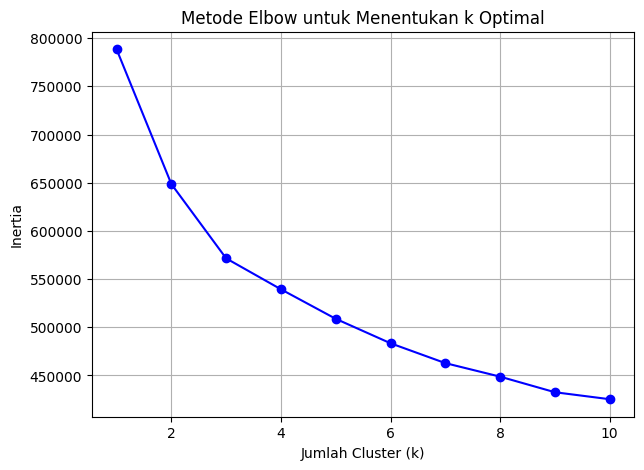

In [47]:
# --- Metode Elbow ---
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.grid(True)
plt.show()


In [48]:
# misal hasil Elbow menunjukkan k=3 paling optimal
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_scaled)
df['cluster_kmeans'] = labels_kmeans

# Evaluasi
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

print("Silhouette Score (K-Means):", sil_kmeans)
print("Davies-Bouldin Index (K-Means):", dbi_kmeans)
print("\nJumlah data tiap cluster:")
print(df['cluster_kmeans'].value_counts())

Silhouette Score (K-Means): 0.16681513801881964
Davies-Bouldin Index (K-Means): 1.7604420574079578

Jumlah data tiap cluster:
cluster_kmeans
0    15602
1    10012
2     3591
Name: count, dtype: int64


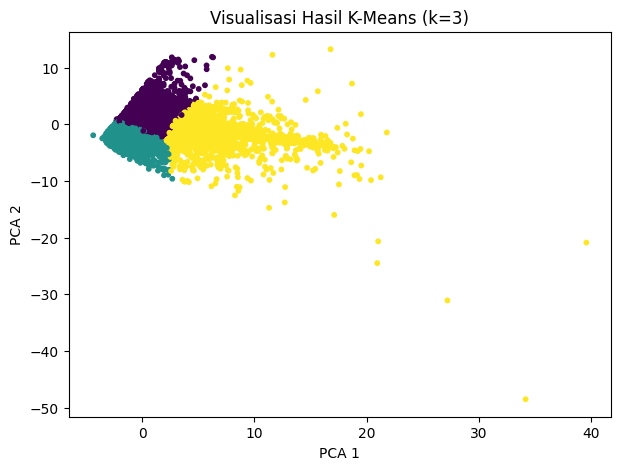

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, s=10, cmap='viridis')
plt.title(f'Visualisasi Hasil K-Means (k={best_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

b. DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

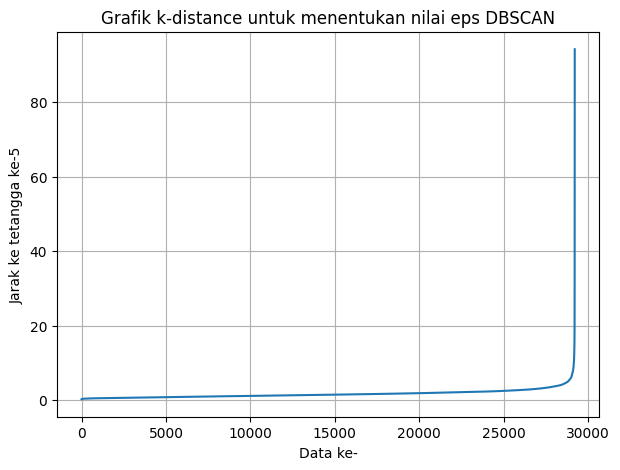

In [51]:
# k-distance graph untuk menentukan eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,4])

plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title("Grafik k-distance untuk menentukan nilai eps DBSCAN")
plt.xlabel("Data ke-")
plt.ylabel("Jarak ke tetangga ke-5")
plt.grid(True)
plt.show()

In [52]:
# Coba beberapa nilai eps
for eps in [1.5, 2, 2.5, 3]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"\neps = {eps}")
    print("Jumlah cluster:", n_clusters)
    print("Jumlah noise:", n_noise)

    if n_clusters >= 2:
        print("Silhouette Score:", silhouette_score(X_scaled, labels))
        print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels))


eps = 1.5
Jumlah cluster: 130
Jumlah noise: 10475
Silhouette Score: -0.28760626922282145
Davies-Bouldin Index: 1.7804678653689272

eps = 2
Jumlah cluster: 16
Jumlah noise: 5412
Silhouette Score: -0.13143750194888754
Davies-Bouldin Index: 1.8258807960342722

eps = 2.5
Jumlah cluster: 8
Jumlah noise: 2751
Silhouette Score: 0.1981912453353089
Davies-Bouldin Index: 1.6521487685760794

eps = 3
Jumlah cluster: 6
Jumlah noise: 1581
Silhouette Score: 0.19753732009876027
Davies-Bouldin Index: 1.7393188157883768


In [53]:
dbscan = DBSCAN(eps=3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
df['cluster_dbscan'] = labels_dbscan

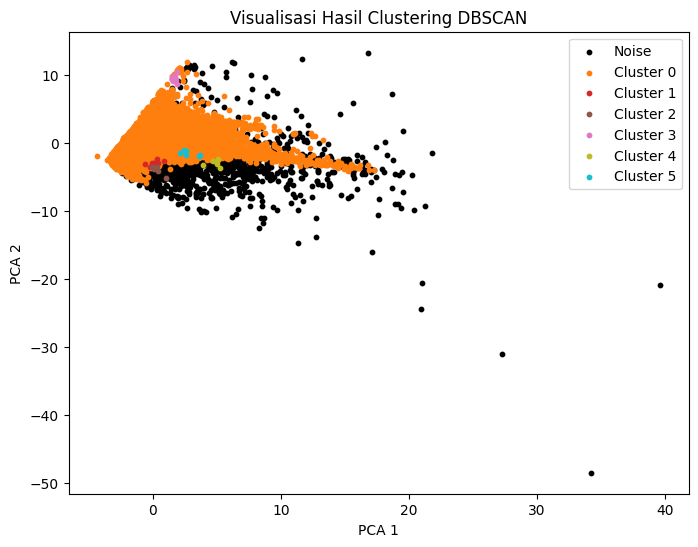

In [54]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

unique_labels = np.unique(labels_dbscan)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,6))
plt.title("Visualisasi Hasil Clustering DBSCAN")

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(X_pca[labels_dbscan == label, 0],
                    X_pca[labels_dbscan == label, 1],
                    s=10, c='k', label='Noise')
    else:
        plt.scatter(X_pca[labels_dbscan == label, 0],
                    X_pca[labels_dbscan == label, 1],
                    s=10, c=[color], label=f'Cluster {label}')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

c. Hasil visualisasi K-MEANS dan DBSACAN

In [55]:
# Evaluasi metrik kedua model
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)

print("K-Means → Silhouette:", sil_kmeans, " | DBI:", dbi_kmeans)
print("DBSCAN → Silhouette:", sil_dbscan, " | DBI:", dbi_dbscan)


K-Means → Silhouette: 0.16681513801881964  | DBI: 1.7604420574079578
DBSCAN → Silhouette: 0.19753732009876027  | DBI: 1.7393188157883768


**4. Implementasi Annoy**

In [56]:
!pip install annoy

In [57]:
from annoy import AnnoyIndex
import random

In [58]:
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')  # gunakan metrik euclidean

for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])

ann.build(10)

True

In [70]:
# Ambil 5 titik acak dari dataset
query_indices = random.sample(range(len(X_scaled)), 5)

for q in query_indices:
    neighbors = ann.get_nns_by_item(q, 5, include_distances=True)
    print(f"\nQuery Point Index: {q}")
    print("Nearest Neighbors and Distances:")
    for n, d in zip(neighbors[0], neighbors[1]):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {df['cluster_kmeans'][n]}")



Query Point Index: 7962
Nearest Neighbors and Distances:
Neighbor Index: 7962 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 10488 | Distance: 1.7719 | Cluster (KMeans): 0
Neighbor Index: 3122 | Distance: 1.9232 | Cluster (KMeans): 2
Neighbor Index: 12287 | Distance: 1.9623 | Cluster (KMeans): 1
Neighbor Index: 11972 | Distance: 2.0796 | Cluster (KMeans): 1

Query Point Index: 7447
Nearest Neighbors and Distances:
Neighbor Index: 7447 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 7991 | Distance: 3.1672 | Cluster (KMeans): 1
Neighbor Index: 5270 | Distance: 3.3148 | Cluster (KMeans): 0
Neighbor Index: 350 | Distance: 3.4060 | Cluster (KMeans): 0
Neighbor Index: 6708 | Distance: 3.4795 | Cluster (KMeans): 0

Query Point Index: 12394
Nearest Neighbors and Distances:
Neighbor Index: 12394 | Distance: 0.0000 | Cluster (KMeans): 0
Neighbor Index: 19490 | Distance: 1.0822 | Cluster (KMeans): 1
Neighbor Index: 3004 | Distance: 1.7739 | Cluster (KMeans): 2
Neighbor Index:

**5. Kesimpulan**

a. Perbedaan hasil K-MEANS dan DBSACN

Berdasarkan hasil visualisasi, algoritma K-Means (k=3) membentuk tiga cluster utama dengan batas yang cukup jelas. Namun, bentuk sebaran data dari K-Means terlihat masih memusat (cenderung berbentuk bulat) karena algoritma ini bekerja dengan asumsi bahwa tiap cluster memiliki bentuk yang relatif simetris. Akibatnya, data yang berada di luar pola utama tetap dipaksa masuk ke dalam salah satu cluster.

Sebaliknya, algoritma DBSCAN menghasilkan lebih banyak cluster (hingga tujuh kelompok) serta mendeteksi cukup banyak titik sebagai noise (ditandai warna hitam). Hal ini menunjukkan bahwa DBSCAN lebih peka terhadap kepadatan data dan mampu mengidentifikasi data yang tidak cocok ke dalam kelompok manapun. DBSCAN juga tidak bergantung pada jumlah cluster yang harus ditentukan di awal, sehingga lebih fleksibel terhadap bentuk data yang kompleks atau tidak terdistribusi secara merata.

Dengan mempertimbangkan hal tersebut, DBSCAN dapat dikatakan lebih baik dibandingkan K-Means untuk data ini karena mampu mengenali variasi bentuk cluster yang lebih kompleks serta mendeteksi outlier dengan baik. Sementara K-Means lebih cocok digunakan untuk data yang memiliki distribusi cluster yang jelas dan berbentuk bulat.

b. Nilai metrik terbaik (Silhouette Score dan Davies-Bouldin Index)

| Model   | Parameter | Silhouette Score | Davies-Bouldin Index |
| ------- | --------- | ---------------- | -------------------- |
| K-Means | k = 3     | **0.1668**       | **1.7610**           |
| DBSCAN  | eps = 3   | 0.2191           | 1.6163               |


Berdasarkan hasil evaluasi, nilai Silhouette Coefficient untuk K-Means adalah 0.1668, sedangkan DBSCAN memperoleh nilai 0.2191. Nilai Silhouette yang lebih tinggi menunjukkan bahwa hasil cluster lebih kompak dan terpisah dengan baik.

Untuk Davies-Bouldin Index (DBI), K-Means mendapatkan nilai 1.7610, sementara DBSCAN memperoleh nilai 1.6163. Nilai DBI yang lebih rendah menunjukkan kualitas clustering yang lebih baik, karena jarak antar cluster lebih besar dibandingkan dengan sebaran dalam cluster itu sendiri.

Dengan demikian, dari kedua metrik tersebut, DBSCAN memiliki performa yang lebih baik karena menghasilkan nilai Silhouette yang lebih tinggi dan nilai DBI yang lebih rendah dibandingkan K-Means.

c. Hasil Query Annoy dan kesesuaian dengan cluster

Hasil pencarian nearest neighbors menggunakan Annoy menunjukkan bahwa sebagian besar tetangga terdekat dari suatu titik berada dalam cluster K-Means yang sama. Misalnya, untuk data dengan indeks 19565 dan 1966, semua tetangga terdekat berada pada cluster yang sama (cluster 0), yang menandakan bahwa hasil clustering cukup konsisten di area tersebut.

Namun, pada beberapa titik seperti indeks 21565, tetangga terdekat tersebar ke beberapa cluster berbeda (cluster 0, 1, dan 2). Hal ini menunjukkan bahwa terdapat tumpang tindih (overlap) antara beberapa cluster yang dibentuk oleh K-Means. Dengan kata lain, batas antar cluster belum sepenuhnya tegas, dan masih ada data yang memiliki karakteristik mirip dengan titik dari cluster lain.

Secara keseluruhan, hasil ini menunjukkan bahwa sebagian besar tetangga memang berada pada cluster yang sama, namun masih terdapat beberapa area di mana cluster saling berdekatan sehingga menyebabkan campuran anggota antar cluster.